In [1]:
#importing necessary packages
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from statistics import mean, stdev

In [2]:
# Read in data
flights = pd.read_csv('downloads/flights.csv')
carriers = pd.read_csv('downloads/by_carrier.csv')
airlines = pd.read_csv('downloads/airlines.csv')

flights = flights.merge(airlines, how = 'left', on = 'carrier')
flights = flights[['arr_delay', 'name']] 

# Filter flight delays between -60 and 120 minutes
flights = flights[flights['arr_delay'].between(-60, 120)]
flights.head(10)

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.
5,12.0,United Air Lines Inc.
6,19.0,JetBlue Airways
7,-14.0,ExpressJet Airlines Inc.
8,-8.0,JetBlue Airways
9,8.0,American Airlines Inc.


In [3]:
flights.to_csv('downloads/formatted_flights.csv')
flights = pd.read_csv('downloads/formatted_flights.csv')
flights['arr_delay'].describe()

count    317113.000000
mean          1.297143
std          29.064401
min         -60.000000
25%         -17.000000
50%          -6.000000
75%          11.000000
max         120.000000
Name: arr_delay, dtype: float64

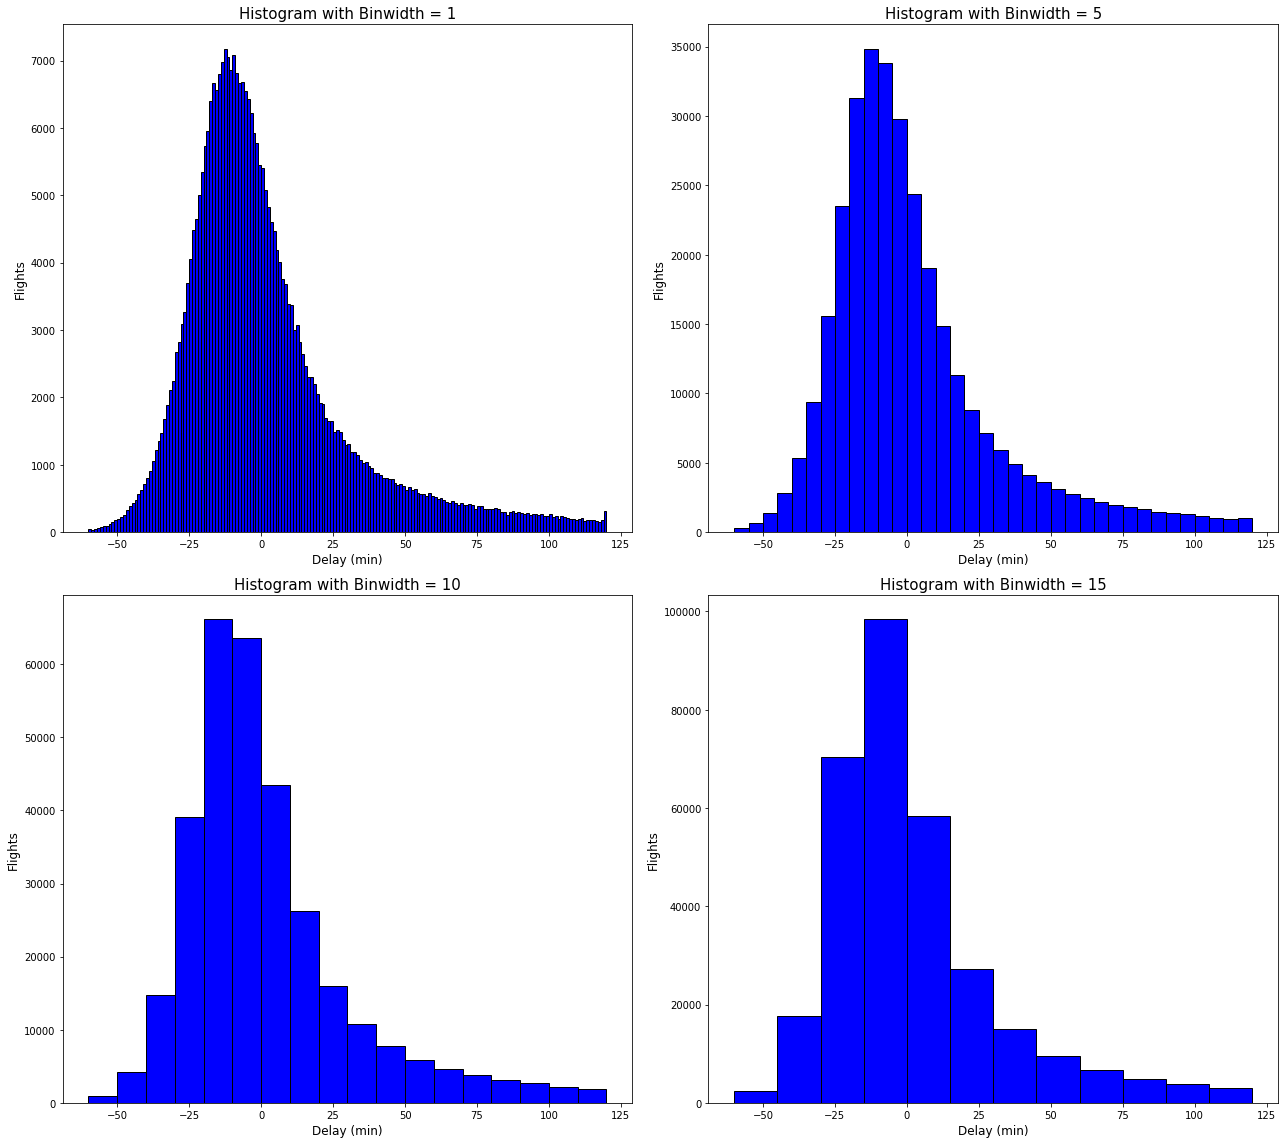

In [4]:
# Min = -60 min and 
# Max = 120 min 
# Range = 120 - (-60) = 180 min

figsize(18, 16)
# different binwidths
for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(flights['arr_delay'], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 15)
    ax.set_xlabel('Delay (min)', size = 12)
    ax.set_ylabel('Flights', size= 12)

plt.tight_layout()
plt.show()

In [5]:
# Extract top five airlines with most flights
carrier_flights = pd.Series(flights.groupby('name')['name'].count())
carrier_flights = carrier_flights.sort_values(ascending=False)
top_five = carrier_flights.index[:5]

# Subset to the top 5 airlines
top_five_flights = flights[flights['name'].isin(top_five)]

# Make a separate list for each airline
x1 = list(flights[flights['name'] == 'United Air Lines Inc.']['arr_delay'])
x2 = list(flights[flights['name'] == 'JetBlue Airways']['arr_delay'])
x3 = list(flights[flights['name'] == 'ExpressJet Airlines Inc.']['arr_delay'])
x4 = list(flights[flights['name'] == 'Delta Air Lines Inc.']['arr_delay'])
x5 = list(flights[flights['name'] == 'American Airlines Inc.']['arr_delay'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


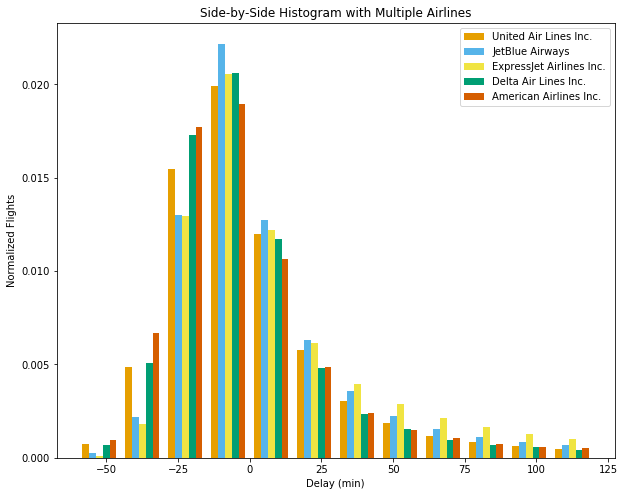

In [6]:
figsize(10, 8)
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), normed=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Airlines');

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Stacked Histogram with Multiple Airlines')

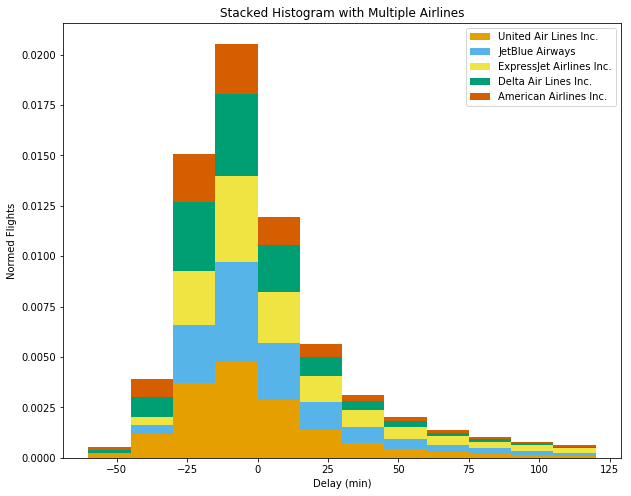

In [7]:
figsize(10, 8)
#Creating a stacked Histogram with multiple airlines
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), normed=True,
         stacked=True,
         color = colors, label=names)

#Plot Formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normed Flights')
plt.title('Stacked Histogram with Multiple Airlines')

Text(0, 0.5, 'Density')

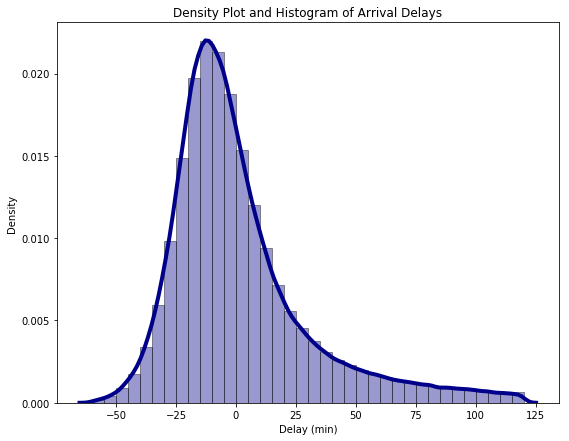

In [8]:
figsize(9, 7)
#Density plot of arrival delays
sns.distplot(flights['arr_delay'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

#Plot Formatting
plt.title('Density Plot and Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

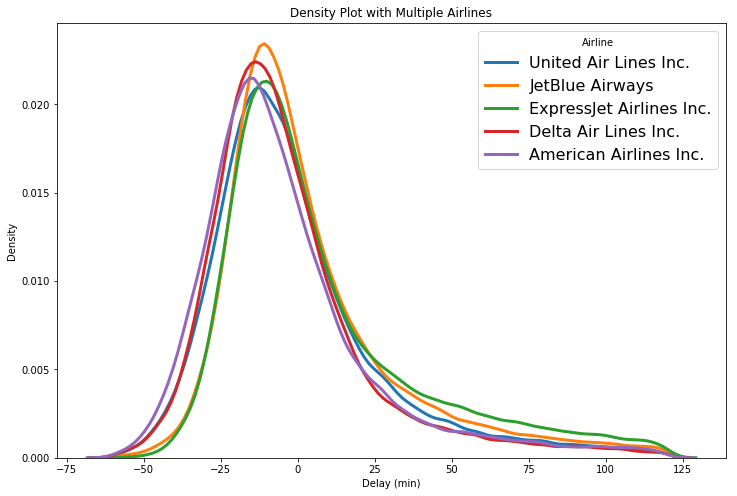

In [9]:
figsize(12, 8)

# List of five airlines to plot
airlines = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

# Iterate through the top five airlines
for airline in airlines:
    # Subset to the airline
    subset = flights[flights['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)

#Plot Formatting
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines'); 
plt.xlabel('Delay (min)')
plt.ylabel('Density');

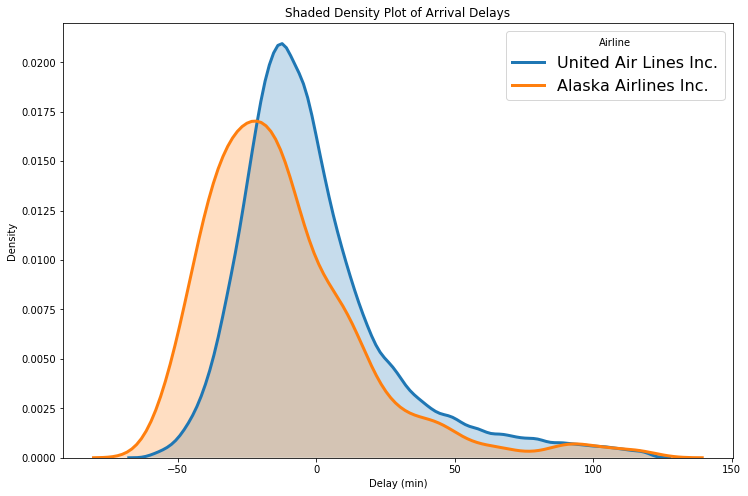

In [10]:
# United airlines Inc. is earlier among the above five airlines
for airline in ['United Air Lines Inc.', 'Alaska Airlines Inc.']:
    subset = flights[flights['name'] == airline]
    
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = airline)

#Plot formatting
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Shaded Density Plot of Arrival Delays'); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');

In [11]:
#Since Alaskan airlines have much lesser delay than the United Airlines, I'd prefer Alaskan airlines

In [12]:
sample = flights.arr_delay.sample(n=1000, random_state = 1)
sample.mean()

1.809

In [13]:
#Sample size is 100
sample1_mean = []
sample1_std = []
j = 0
i = 0
while i < 100:
  j += 1
  sample = flights.arr_delay.sample(n=1000, random_state=j)
  sample_mean = sample.mean()
  sample_std = sample.std()
  sample1_mean.append(sample_mean)
  sample1_std.append(sample_std)
  i += 1

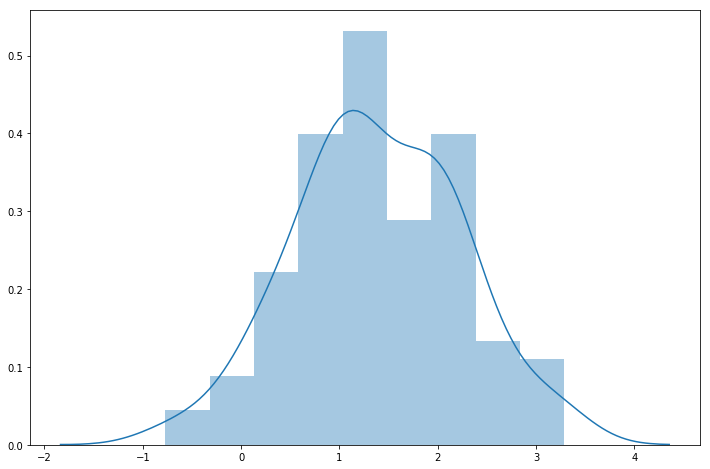

In [14]:
# Graph for 100 samples
# The graph does not look like normal curve
sample100 = sns.distplot(sample1_mean,kde=True)

In [15]:
# Sample size is 10000
sample2_mean = []
sample2_std = []
j2 = 0
i2 = 0
while i2 < 10000:
  j2 += 1
  sample = flights.arr_delay.sample(n=1000, random_state=j2)
  sample_mean = sample.mean()
  sample_std = sample.std()
  sample2_mean.append(sample_mean)
  sample2_std.append(sample_std)
  i2 += 1


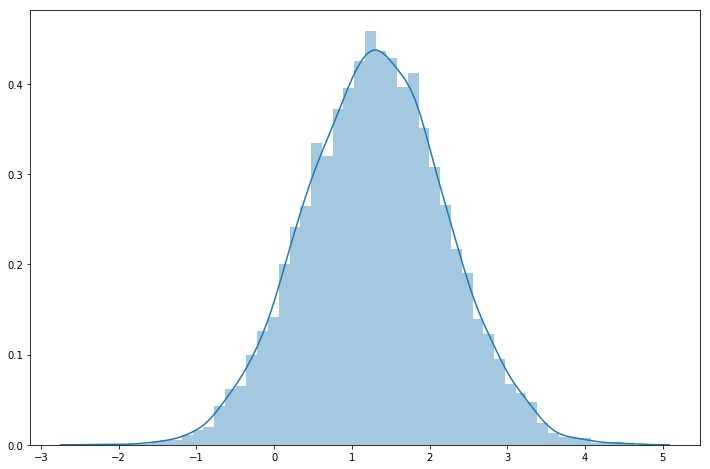

In [16]:
# The graph for 1000 samples look like a normal distribution curve
sample10000 = sns.distplot(sample2_mean,kde=True)

In [17]:
#The Central Limit Theorem states that given a sufficiently large sample size from a population with
#a finite level of variance, the mean of all samples from the same population will be approximately 
#equal to the mean of the population.
#Larger the sample size the closer would be the sample's mean to the populations mean
#Increase in sample size leads to smaller spread in sampling distribution
print("Mean of 10000 random samples = ",mean(sample2_mean))
print("Entire population mean = ",flights.arr_delay.mean())
print("This shows that the mean of 10000 random samples is approximately equal to the mean of entire population")

Mean of 10000 random samples =  1.3033595
Entire population mean =  1.2971432896160044
This shows that the mean of 10000 random samples is approximately equal to the mean of entire population
